⚫️ 課題 3
　　　　 K 近傍法の実装


In [1]:
# モジュールのインポート

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

In [7]:
# 境界を可視化するための関数


def plot_decision_boundary(X, model, offset=1, width=0.01):
    min1, max1 = X[:, 0].min() - offset, X[:, 0].max() + offset  # x軸の範囲設定
    min2, max2 = X[:, 1].min() - offset, X[:, 1].max() + offset  # y軸の範囲設定

    x1grid = np.arange(min1, max1, width)
    x2grid = np.arange(min2, max2, width)

    xx, yy = np.meshgrid(x1grid, x2grid)

    r1, r2 = xx.flatten(), yy.flatten()  # 縦ベクトルに変換
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    grid = np.hstack((r1, r2))

    y_pred = model.predict(grid)

    zz = y_pred.reshape(xx.shape)

    plt.contourf(xx, yy, zz, cmap="Paired")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="cividis")
    plt.xlabel("X1", fontsize=16)
    plt.ylabel("X2", fontsize=16)

In [54]:
# KNNモデル


class KNN_classifier:
    def __init__(self, k):
        self.k = k

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        dist = np.zeros((x_test.shape[0], self.x_train.shape[0]), dtype=np.float32)
        """
        for i in range(x_test.shape[0]):
            for j in range(self.x_train.shape[0]):
                dist[i, j] = (
                    (np.sum(self.x_train[j] ** 2))
                    + (np.sum(x_test[i] ** 2))
                    - 2 * np.dot(self.x_train[j], x_test[i])
                )
        """
        # dist計算の高速化
        dist = np.sum(self.x_train**2, axis=1, keepdims=True).T - 2 * np.dot(
            x_test, self.x_train.T
        )
        idx = np.argsort(dist)[:, : self.k]
        label_k_nearest = self.y_train[idx]
        prediction = np.zeros(x_test.shape[0])
        for l, labels in enumerate(label_k_nearest):
            prediction[l] = np.bincount(labels).argmax()
        return prediction.astype(int)

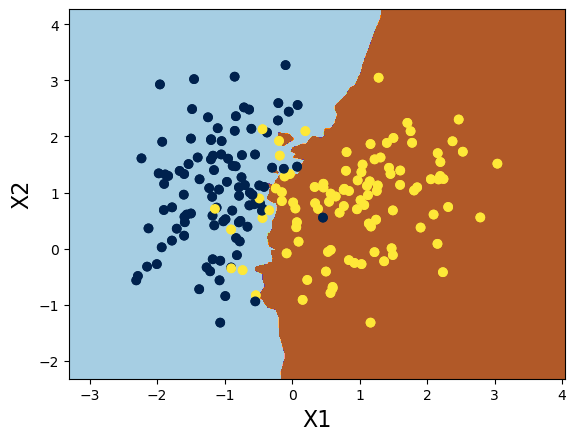

In [56]:
# make_classificationの決定境界

X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=15,
)
model = KNN_classifier(6)
model.fit(X, y)
plot_decision_boundary(X, model)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="cividis")
plt.show()

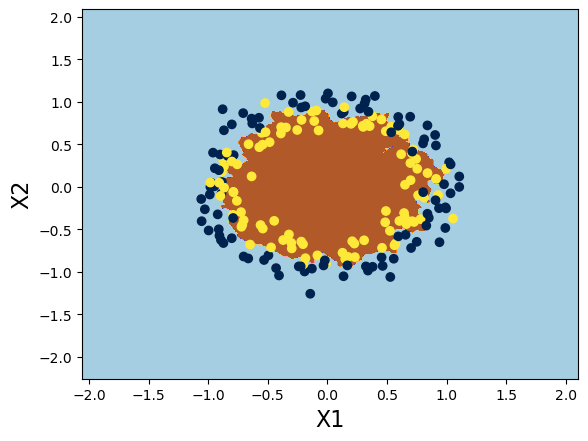

In [70]:
# make_circlesの決定境界

X, y = make_circles(n_samples=200, noise=0.1, random_state=10)
k_neighbor = 4

model = KNN_classifier(k_neighbor)
model.fit(X, y)

plot_decision_boundary(X, model)

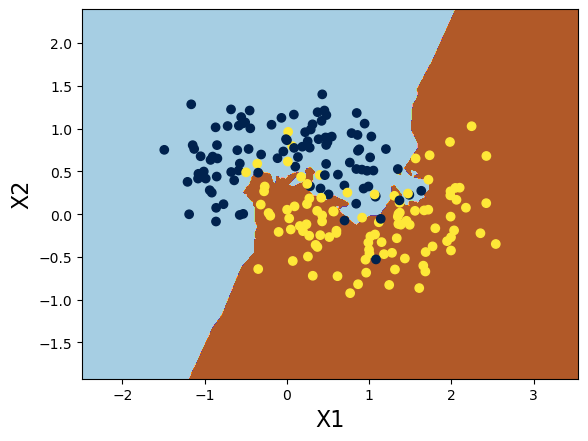

In [73]:
# make_moonsの決定境界

X, y = make_moons(n_samples=200, noise=0.3)
k_neighbor = 4

model = KNN_classifier(k_neighbor)
model.fit(X, y)

plot_decision_boundary(X, model)

In [117]:
# 2分割交差検証法によるaccuracyをプロットする関数の定義


def Two_Cross_Validation_plot(Data, title):
    # Dataの2分割
    x_train, x_test, y_train, y_test = train_test_split(
        Data.data, Data.target, test_size=0.5, random_state=0
    )
    accuracies = []
    k_range = range(1, 21)

    for k in k_range:
        for i in range(2):
            if i == 1:
                knn = KNN_classifier(k)
                knn.fit(x_train, y_train)
                y_pred_1 = knn.predict(x_test)
                accuracy1 = accuracy_score(y_test, y_pred_1)

            else:
                knn = KNN_classifier(k)
                knn.fit(x_test, y_test)
                y_pred_2 = knn.predict(x_train)
                accuracy2 = accuracy_score(y_train, y_pred_2)

        accuracy = (accuracy1 + accuracy2) / 2
        accuracies.append(accuracy)

    # グラフにプロット
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, accuracies, marker="o", linestyle="-", color="r")
    plt.title(f"Cross Validation Accuracy \n Data name : {title}")
    plt.xlabel("k Value")
    plt.ylabel("Accuracy")
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

    # 最も高い識別率を持つkの値を見つける
    best_k = k_range[np.argmax(accuracies)]
    print(f"最適なkの値: {best_k}")

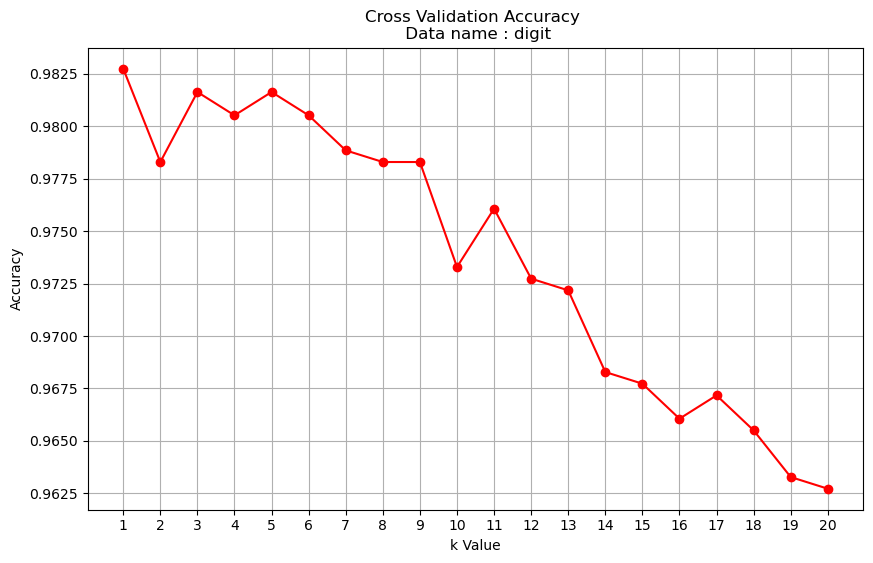

最適なkの値: 1


In [118]:
# digit_datasetsの交差検証法

digits = load_digits()
Two_Cross_Validation_plot(digits, "digit")

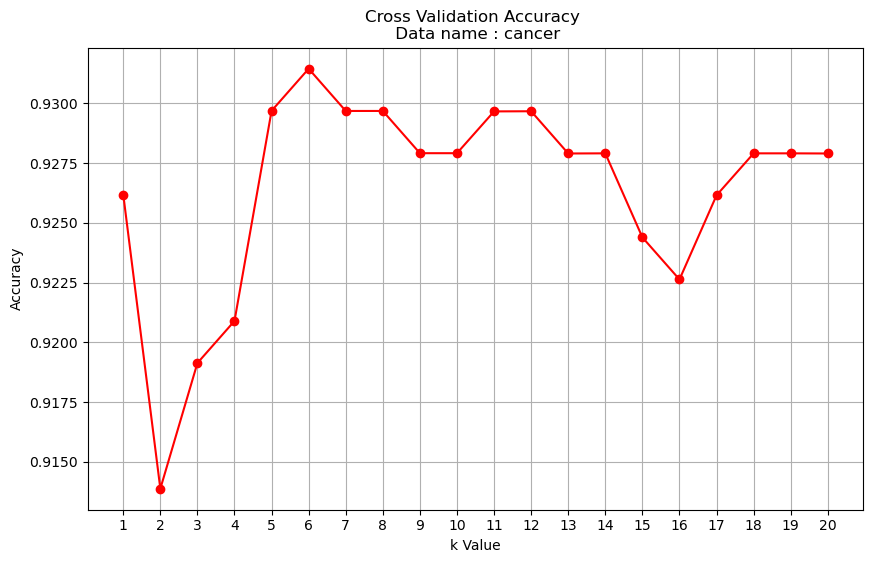

最適なkの値: 6


In [119]:
# (参考)乳癌データセットを用いた2分割交差検証法
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
Two_Cross_Validation_plot(cancer, "cancer")

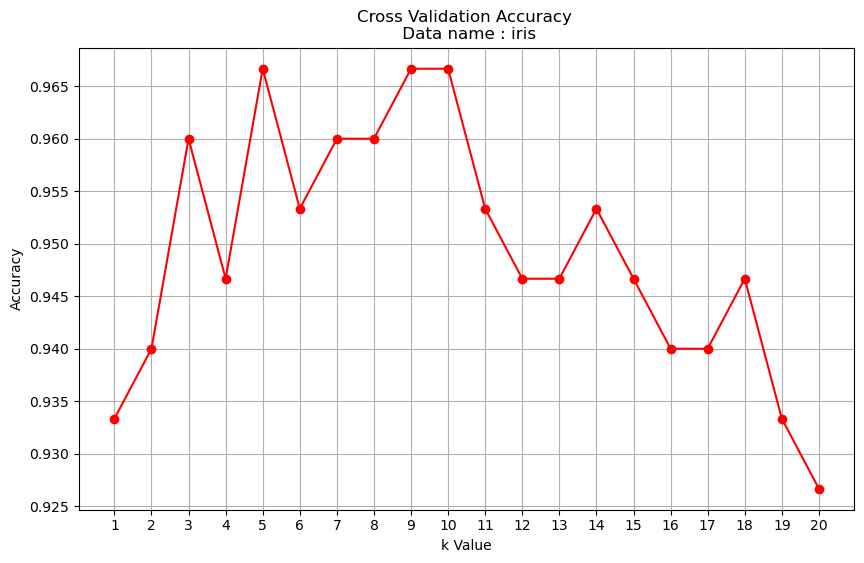

最適なkの値: 5


In [120]:
# (参考)irisデータセットを用いた2分割交差検証法
from sklearn.datasets import load_iris

iris = load_iris()
Two_Cross_Validation_plot(iris, "iris")